### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
#import plotly.offline as pyo
#pyo.init_notebook_mode()

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

### Data cleaning

I've decided to drop the car column due to too many missing data and being irrelevant to my exploration, there after i removed all the null (or missing) values

I checked again the data information to see how many rows are in total, from the original  rows, I lost.
In total we dropped 605 rows which is about 5% of the total data we started with.  12684 - 12079 = 605

In [6]:
data = data.drop(columns=['car'])
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [20]:
df_accepted_coupon = data["Y"]
total_rows = df_accepted_coupon.count()
accepted_coupon = df_accepted_coupon.sum()
not_accepted_coupon = total_rows - accepted_coupon

proportion = (accepted_coupon * 100) / total_rows
#proportion

#print(np.round(proportion,2),'% of the total observations chose to accept the coupon')

> **56.93 % of the total observations chose to accept the coupon**

5. Use a bar plot to visualize the `coupon` column.

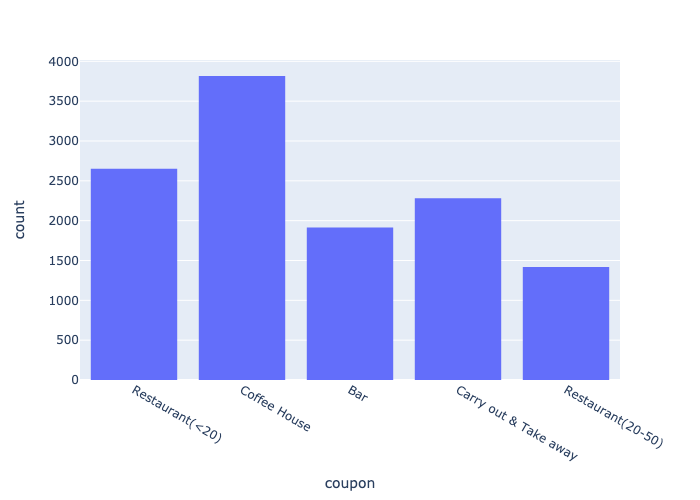

In [8]:
hist = px.histogram(data, x= 'coupon')
hist.show('png')

6. Use a histogram to visualize the temperature column.

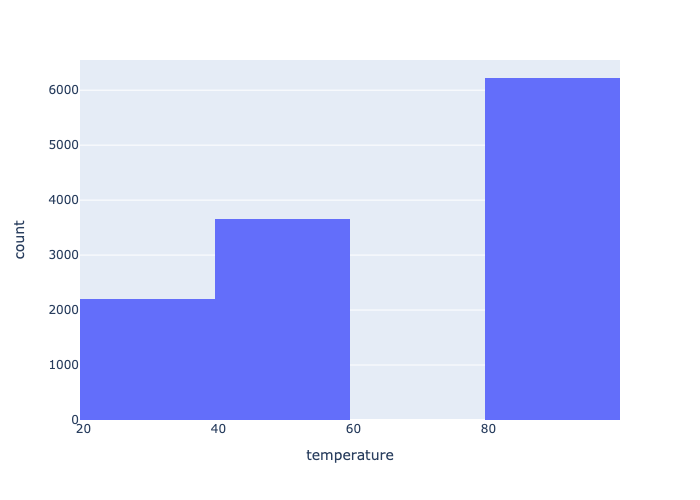

In [9]:
hist = px.histogram(data, x= 'temperature')
hist.show('png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
df_bar_coupon = data.query('coupon == "Bar"')
num_df_bar_coupon = df_bar_coupon["Y"].count()
num_df_bar_coupon
df_bar_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


> *In the code below, t_ represent temporarty value*

In [38]:
t_accept_bar_coupon = df_bar_coupon.query('Y == 1').count()
accept_bar_coupon = t_accept_bar_coupon["Y"]
accept_bar_coupon

proportion_bar_coupon = (accept_bar_coupon * 100) / num_df_bar_coupon
#proportion_bar_coupon
#print(np.round(proportion_bar_coupon,2),'% of the total observations, who recived the bar coupon, accepted the coupon')

> **41.19 % of the total observations, who recived the bar coupon, accepted the coupon**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


> *In the code below, u3 =  Under 3, 4o = Over 4, PT = Proportion Total*

In [54]:
accept_went__u3 = df_bar_coupon.query('Bar == "1~3" and Y == 1').count()
t_accept_went__u3 = accept_went__u3["Y"]
t_accept_went__u3
#proportion_total_accepted_and_went_3_time_or_less

accept_went_4o = df_bar_coupon.query('(Bar == "4~8" or Bar == "gt8") and Y == 1').count()
t_accept_went_4o = accept_went_O4["Y"]
t_accept_went_4o

#accept_bar_coupon - placeing it here but calculation is above.

#print(accept_bar_coupon, t_accept_went__u3, temp_accept_went_4o)

PT_t_accept_went__u3 = \
            + (t_accept_went__u3 * 100) / accept_bar_coupon 


#print(PT_t_accept_went__u3)
#print(np.round(proportion_total_accepted_and_went_3_time_or_less,2),'% of those who accepted the Bar coupon, went to a bar 3 times or less')

PT_t_accept_went_4o = \
            + (t_accept_went_4o * 100) / accept_bar_coupon 

#print(PT_t_accept_went_4o)
#print(np.round(proportion_total_accepted_went_4_time_or_more,2),'% of those who accepted the Bar coupon, went to a bar 4 times or more.')

> **31.09 % of those who accepted the Bar coupon, went to a bar 3 times or less.**

> **18.65 % of those who accepted the Bar coupon, went to a bar 4 times or more.**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


> *In the code below, 1o = over 1, o25y = Over 25 years, u25y = Under 25 years,PT = Proportion Total*

In [55]:
all_accepted = df_bar_coupon.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8")').count()
t_accept_went_1o = all_accepted["Y"]
t_accept_went_1o

accept_went_1o_is_o25y = df_bar_coupon.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and age >= "25"').count()
t_accept_went_1o_is_o25y = accept_went_1o_is_o25y["Y"]
t_accept_went_1o_is_o25y

accept_went_1o_is_u25y = df_bar_coupon.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and age < "25"').count()
t_accept_went_1o_is_u25y = accept_went_1o_is_u25y["Y"]
t_accept_went_1o_is_u25y



PT_t_accept_went_1o_is_o25y = \
            + (t_accept_went_1o_is_o25y * 100) / t_accept_went_1o

PT_t_accept_went_1o_is_u25y = \
            + (t_accept_went_1o_is_u25y * 100) / t_accept_went_1o


#print(t_accept_went_1o, t_accept_went_1o_is_o25y, t_accept_went_1o_is_u25y)
#print(np.round(PT_t_accept_went_1o_is_o25y,2),'% of those who accepted the Bar coupon, went to a bar 1 times or more and are 25 or older.')
#print(np.round(PT_t_accept_went_1o_is_u25y,2),'% of those who accepted the Bar coupon, went to a bar 1 times or more and are under 25.')

> **72.2 % of those who accepted the Bar coupon, went to a bar 1 times or more and are 25 or older.**

> **27.8 % of those who accepted the Bar coupon, went to a bar 1 times or more and are under 25.**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


> *In the code below, K = Kids, B = Bar, PT = Proportion Total*

In [60]:
all_accept_no_K = df_bar_coupon.query('(passanger != "Kid(s)") and \
+ (Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (occupation != "Farming Fishing & Forestry")').count()
t_all_accept_no_K = all_accept_no_K["Y"]
t_all_accept_no_K

all_accept_B = df_bar_coupon.query('(Bar == "1~3" or Bar == "4~8" or Bar == "gt8")').count()
t_all_accept_B = all_accept_B["Y"]
t_all_accept_B

proportion_accepted_without_kids = \
            + (t_all_accept_no_K * 100) / t_all_accept_B


print(t_all_accept_no_K, t_all_accept_B, proportion_accepted_without_kids)
#print(np.round(proportion_accepted_without_kids,2),'% of those who accepted the Bar coupon and went to a bar 1 times or more, had no kids passanger and did not work in farming, fishing, or forestry.')

530 572 92.65734265734265


> **92.66 % of those who accepted the Bar coupon and went to a bar 1 times or more, had no kids passanger and did not work in farming, fishing, or forestry.**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



> *In the code below, K = Kids, W = widowed, u30 = Under 30, u50K = Under 50K income, chp_res =  cheap restaurants ,PT = Proportion Total*

In [67]:
all_accepted_coupon = df_bar_coupon["Y"].count()
all_accepted_coupon

accepted_coupon_no_K_not_W = df_bar_coupon.query('(passanger != "Kid(s)") and \
+ (Bar == "1~3" or Bar == "4~8" or Bar == "gt8") and (maritalStatus != "Widowed")').count()
t_accepted_coupon_no_K_not_W = accepted_coupon_no_K_not_W["Y"]
t_accepted_coupon_no_K_not_W

PT_accepted_no_K_not_W = \
            + (t_accepted_coupon_no_K_not_W * 100) / all_accepted_coupon



accepted_coupon_no_K_u30 = df_bar_coupon.query('(age <= "30") and \
+ (Bar == "1~3" or Bar == "4~8" or Bar == "gt8")').count()
t_accepted_coupon_no_K_u30 = accepted_coupon_no_K_u30["Y"]
t_accepted_coupon_no_K_u30

PT_accepted_coupon_no_K_u30 = \
            + (t_accepted_coupon_no_K_u30 * 100) / all_accepted_coupon



accepted_coupon_chp_res_in_u50K = \
    + df_bar_coupon.query('(income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$$37500 - $49999") and (RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8")').count()
t_accepted_coupon_chp_res_in_u50K = accepted_coupon_chp_res_in_u50K["Y"]
t_accepted_coupon_chp_res_in_u50K

PT_accepted_coupon_chp_res_in_u50K = \
            + (t_accepted_coupon_chp_res_in_u50K * 100) / all_accepted_coupon



print(t_accepted_coupon_no_K_not_W, t_accepted_coupon_no_kids_u30, t_accepted_coupon_chp_res_in_u50K, all_accepted_coupon)


print(np.round(PT_accepted_no_K_not_W,2),'% of those who accepted the Bar coupon and went to a bar 1 times or more, had no kids passanger and were not widowed')
print(np.round(PT_accepted_coupon_no_K_u30,2),'% of those who accepted the Bar coupon and went to a bar 1 times or more, are under the age of 30')
print(np.round(PT_accepted_coupon_chp_res_in_u50K,2),'% of those who accepted the Bar coupon and went to a bar 1 times or more, go to cheap restaurants more than 4 times a month and income is less than 50K.')



530 318 243 1913
27.71 % of those who accepted the Bar coupon and went to a bar 1 times or more, had no kids passanger and were not widowed
16.62 % of those who accepted the Bar coupon and went to a bar 1 times or more, are under the age of 30
12.7 % of those who accepted the Bar coupon and went to a bar 1 times or more, go to cheap restaurants more than 4 times a month and income is less than 50K.


> **27.71 % of those who accepted the Bar coupon and went to a bar 1 times or more, had no kids passanger and were not widowed.**

> **16.62 % of those who accepted the Bar coupon and went to a bar 1 times or more, are under the age of 30.**

>**12.7 % of those who accepted the Bar coupon and went to a bar 1 times or more, go to cheap restaurants more than 4 times a month and income is less than 50K.**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

##### Hypothesize

Our driver profile is a person who is between the ages of 25 and 30 years old. 
They most likely visiting a bar, less then 3 times a month and not widowed. 
They are not working in farming, fishing, or forestry and respect the law.

In [107]:
driver = df_bar_coupon.query('(passanger != "Kid(s)") and (age <= "30") and \
+ (Bar == "1~3") and (maritalStatus != "Widowed") and \
+ (occupation != "Farming Fishing & Forestry") and \
+ (income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$$37500 - $49999") and \
+ (RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8")').count()
t_driver = driver["Y"]
t_driver

PT_t_driver = \
            + (t_driver * 100) / all_accepted_coupon

PT_t_driver

print('Our driver represent ' ,np.round(PT_t_driver,2), '% of total drivers who accepted the bar coupon')

Our driver represent  1.57 % of total drivers who accepted the bar coupon


>**Our driver represent  1.57 % of total drivers who accepted the bar coupon.**

#### Bit more investigation on this

 - Is it likely that they go to more upscale restaurant, like 20-50?

 * Does the income change the profile?

 + Does gender have an impact if we ignore the income?

In [106]:
driver = df_bar_coupon.query('(passanger != "Kid(s)") and (age <= "30") and \
+ (Bar == "1~3") and (maritalStatus != "Widowed") and \
+ (occupation != "Farming Fishing & Forestry") and \
+ (income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$$37500 - $49999") and \
+ (Restaurant20To50 == "4~8" or Restaurant20To50 == "gt8")').count()
t_driver = driver["Y"]
t_driver

PT_t_driver = \
            + (t_driver * 100) / all_accepted_coupon

PT_t_driver

print('Our driver represents only' ,np.round(PT_t_driver), '% of total drivers who accepted the bar coupon, even if changing the reastaurant scall, Restaurant 20 To 50.')

Our driver represents only 1.0 % of total drivers who accepted the bar coupon, even if changing the reastaurant scall, Restaurant 20 To 50.


>**Our driver represents only 1.0 % of total drivers who accepted the bar coupon, even if changing the reastaurant scall, Restaurant 20 To 50.**

In [105]:
driver = df_bar_coupon.query('(passanger != "Kid(s)") and (age <= "30") and \
+ (Bar == "1~3") and (maritalStatus != "Widowed") and \
+ (occupation != "Farming Fishing & Forestry") and \
+ (occupation != "Farming Fishing & Forestry") and \
+ (income == "$100000 or More" or income == "$50000 - $62499" or income == "$62500 - $74999" or income == "$75000 - $87499" ) and \
+ (Restaurant20To50 == "4~8" or Restaurant20To50 == "gt8")').count()
t_driver = driver["Y"]
t_driver

PT_t_driver = \
            + (t_driver * 100) / all_accepted_coupon

PT_t_driver

print('Our driver represents only' ,np.round(PT_t_driver), '% of total drivers who accepted the bar coupon, if we change the income to over 50K, we loos all data, there are no drivered that accepting the coupon.')

Our driver represents only 0.0 % of total drivers who accepted the bar coupon, if we change the income to over 50K, we loos all data, there are no drivered that accepting the coupon.


>**Our driver represents only 0.0 % of total drivers who accepted the bar coupon, if we change the income to over 50K, we loos all data, there are no drivered that accepting the coupon.**

In [118]:
driver = df_bar_coupon.query('(passanger != "Kid(s)") and (age <= "30") and \
+ (Bar == "1~3") and (maritalStatus != "Widowed") and \
+ (occupation != "Farming Fishing & Forestry") and \
+ (gender != "Male") and \
+ (RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8")').count()
t_driver = driver["Y"]
t_driver

PT_t_driver = \
            + (t_driver * 100) / all_accepted_coupon

PT_t_driver

print('Our driver represent ' ,np.round(PT_t_driver,2), '% of total drivers who accepted the bar coupon')

Our driver represent  2.04 % of total drivers who accepted the bar coupon


>**if we ignot the income, Our driver represent  3.97 % of total drivers who accepted the bar coupon, female at this case ate 1.93 % of that and male are 2.04% of that.**>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

##### Total recived 'Coffee House' coupon

In [124]:
df_CH_coupon = data.query('coupon == "Coffee House"')
t_CH_coupon = df_CH_coupon["Y"].count()
t_CH_coupon

3816

##### Total recived and eccepted as a % of the total

In [123]:
t_df_CH_coupon = df_CH_coupon.query('Y == 1').count()
accept_CH_coupon = t_df_CH_coupon["Y"]
#accept_CH_coupon

PT_accept_CH_coupon = (accept_CH_coupon * 100) / t_CH_coupon
#PT_accept_CH_coupon
print(np.round(PT_accept_CH_coupon,2),'% of the total observations, who recived the Coffee House coupon, accepted the coupon')

49.63 % of the total observations, who recived the Coffee House coupon, accepted the coupon


### Visualization